In [2]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [3]:
# Patient file paths
patients = {
    1: ['Data/organized_fcs_data1a.csv', 'Data/organized_fcs_data1b.csv', 'Data/organized_fcs_data1c.csv'],
    2: ['Data/organized_fcs_data2a.csv', 'Data/organized_fcs_data2b.csv', 'Data/organized_fcs_data2c.csv'],
    3: ['Data/organized_fcs_data3a.csv', 'Data/organized_fcs_data3b.csv', 'Data/organized_fcs_data3c.csv'],
    4: ['Data/organized_fcs_data4a.csv', 'Data/organized_fcs_data4b.csv', 'Data/organized_fcs_data4c.csv'],
    5: ['Data/organized_fcs_data5a.csv', 'Data/organized_fcs_data5b.csv', 'Data/organized_fcs_data5c.csv'],
    6: ['Data/organized_fcs_data6a.csv', 'Data/organized_fcs_data6b.csv', 'Data/organized_fcs_data6c.csv'],
    7: ['Data/organized_fcs_data7.csv'],
    8: ['Data/organized_fcs_data8a.csv', 'Data/organized_fcs_data8b.csv', 'Data/organized_fcs_data8c.csv'],
    9: ['Data/organized_fcs_data9a.csv', 'Data/organized_fcs_data9b.csv'],
    10: ['Data/organized_fcs_data10a.csv', 'Data/organized_fcs_data10b.csv', 'Data/organized_fcs_data10c.csv'],
    11: ['Data/organized_fcs_data11.csv'],
    12: ['Data/organized_fcs_data12a.csv', 'Data/organized_fcs_data12b.csv', 'Data/organized_fcs_data12c.csv']
}

In [4]:
def load_patient_data(patient_ids):
    all_data = []
    for pid in patient_ids:
        for file in patients[pid]:
            if os.path.exists(file):
                df = pd.read_csv(file)
                df = df.drop(columns=['Time'])  
                all_data.append(df.astype(np.float32).values)
            else:
                print(f"File not found: {file}")
    if all_data:
        return np.vstack(all_data)
    else:
        return np.empty((0, 14))


In [5]:
# Load healthy and unhealthy data
healthy_cells = load_patient_data([1, 2, 3, 4, 5, 6])
unhealthy_cells = load_patient_data([7, 8, 9, 10, 11, 12])

In [6]:
# Scaling data 
print("Scaling data")
scaler = StandardScaler()
healthy_cells_scaled = scaler.fit_transform(healthy_cells)
unhealthy_cells_scaled = scaler.transform(unhealthy_cells)

Scaling data


Running Elbow Method for healthy cells


python(7962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


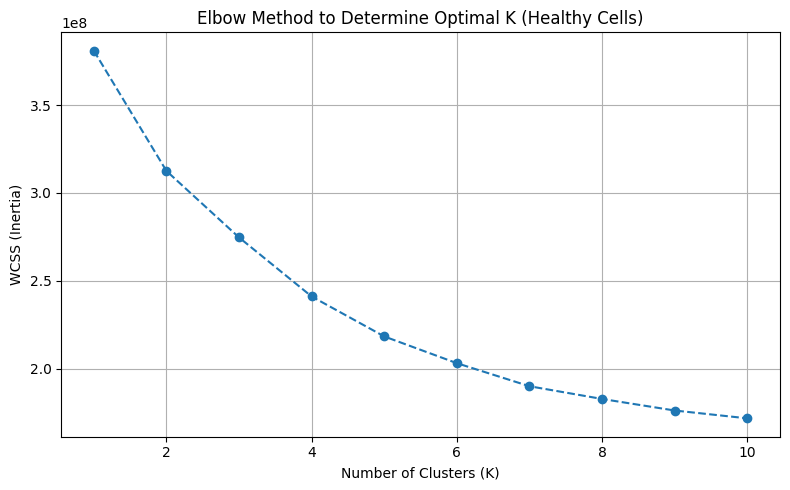

In [7]:
# using WCSS on healthy data to find best k
print("Running Elbow Method for healthy cells")
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(healthy_cells_scaled)
    wcss.append(kmeans.inertia_)  

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K (Healthy Cells)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Rate of decrease:

# K	WCSS (approx)	 Drop from previous
# 1	3.8e8	                –
# 2	3.15e8	            ~0.65e8
# 3	2.75e8	            ~0.40e8
# 4	2.4e8	            ~0.35e8
# 5	2.2e8	            ~0.20e8
# 6	2.05e8	            ~0.15e8
# 7	1.9e8	            ~0.15e8
# 8	1.8e8	            ~0.1e8
# 9	1.72e8	            ~0.08e8
#10	1.65e8	            ~0.07e8

# From K=1 to K=4: Big WCSS improvements
# After K=4: The improvement slows down significantly

# Thus k = 4 could be ideal no. of clusters